### predicting future of forest

In [1]:
### Keras and Tensorflow >2.0

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
hectare_loss = np.array([5,3,2,4,12,17,21,43,18,94,105,58,10,16,3,16,0.619,5,4,7])

In [3]:
np.random.seed = 2
temp = np.array(np.random.rand(20,52))

In [4]:
print(temp)

[[0.25457601 0.07512685 0.32101476 ... 0.68071675 0.43350462 0.44449784]
 [0.16230096 0.84522106 0.23776025 ... 0.80626454 0.43673642 0.93033159]
 [0.07030993 0.92990772 0.9832079  ... 0.82217729 0.75767026 0.522223  ]
 ...
 [0.91067252 0.6047676  0.68410711 ... 0.58433625 0.36168678 0.52165472]
 [0.27662096 0.70901519 0.2747395  ... 0.09232753 0.1849115  0.3126614 ]
 [0.77363831 0.94339551 0.94043988 ... 0.99065243 0.0363792  0.73952542]]


In [5]:
for i in range(len(hectare_loss)):
    t = sum(temp[i])
    temp[i] = (temp[i]/t)*hectare_loss[i]

In [6]:
for i in temp:
    print(sum(i))

5.0
2.9999999999999982
1.9999999999999993
3.9999999999999996
11.999999999999995
17.000000000000004
21.000000000000004
42.99999999999999
18.0
93.99999999999994
104.99999999999996
57.999999999999986
10.0
16.000000000000004
3.0000000000000018
16.0
0.6189999999999998
5.000000000000002
3.9999999999999996
6.999999999999997


In [7]:
temp

array([[0.0495694 , 0.01462821, 0.06250592, ..., 0.13254477, 0.08440922,
        0.08654975],
       [0.02035012, 0.10597809, 0.02981158, ..., 0.10109353, 0.05476022,
        0.11664968],
       [0.00544401, 0.07200159, 0.07612855, ..., 0.06366016, 0.05866546,
        0.04043507],
       ...,
       [0.1547726 , 0.10278278, 0.11626686, ..., 0.09931039, 0.06147018,
        0.0886574 ],
       [0.03967107, 0.10168208, 0.03940125, ..., 0.01324098, 0.02651874,
        0.04483975],
       [0.19916349, 0.24286535, 0.24210446, ..., 0.25503105, 0.00936537,
        0.19038155]])

In [8]:
a,b = temp.shape
temp = temp.reshape(1, a*b)

In [9]:
temp.shape

(1, 1040)

In [10]:
total_area = 1692
remaining = 1692
forest_left = []
for loss in temp[0]:
    remaining = remaining-loss
    left = (remaining-loss)*100/1692
    forest_left.append(left)

In [11]:
forest_left

[99.99414073305825,
 99.99534126317805,
 99.98881740793053,
 99.98944771044879,
 99.9837501526034,
 99.98173397162387,
 99.96714541081363,
 99.9644074948138,
 99.96501347712693,
 99.94548642096669,
 99.94446602980504,
 99.93094392384573,
 99.92685347587356,
 99.91972508460064,
 99.90639261741428,
 99.89791495408059,
 99.90711868085798,
 99.89017288446105,
 99.8822543380103,
 99.88064920136905,
 99.86462870884385,
 99.85834571266597,
 99.85999419219802,
 99.85338328923773,
 99.85580856082439,
 99.84199542868697,
 99.84122918880172,
 99.83285112897221,
 99.82849042858928,
 99.81541606784694,
 99.82373991254165,
 99.80492676503647,
 99.79283115151861,
 99.80202055401817,
 99.79680586655441,
 99.79653170453149,
 99.78456844172928,
 99.78073632819142,
 99.7783738682639,
 99.77126666644277,
 99.7574202044331,
 99.74863203178886,
 99.74745329813973,
 99.74001206020534,
 99.74439828194822,
 99.73921001864835,
 99.72911171031674,
 99.7135458522209,
 99.72023576134872,
 99.70676206856555,
 99.70

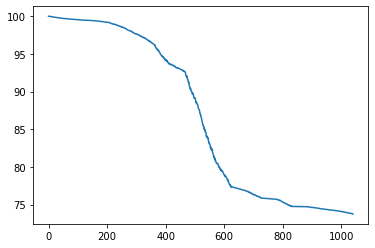

In [12]:
plt.plot(forest_left)

In [13]:
df1 = pd.DataFrame(forest_left)

In [14]:
df1

,0
0,99.994141
1,99.995341
2,99.988817
3,99.989448
4,99.983750
...,...
1035,73.809920
1036,73.796356
1037,73.778116
1038,73.792081


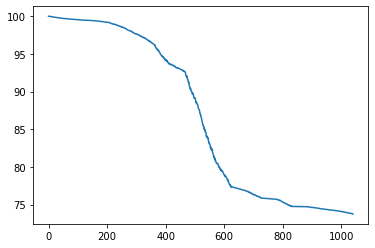

In [15]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [16]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [17]:
import numpy as np

In [18]:
df1

,0
0,99.994141
1,99.995341
2,99.988817
3,99.989448
4,99.983750
...,...
1035,73.809920
1036,73.796356
1037,73.778116
1038,73.792081


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
print(df1)

[[9.99954222e-01]
 [1.00000000e+00]
 [9.99751237e-01]
 ...
 [3.04458228e-04]
 [8.36989308e-04]
 [0.00000000e+00]]


In [21]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.8)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [22]:
training_size,test_size

(832, 208)

In [23]:
train_data

array([[0.99995422],
       [1.        ],
       [0.99975124],
       [0.99977527],
       [0.99955802],
       [0.99948114],
       [0.99892486],
       [0.99882046],
       [0.99884356],
       [0.99809897],
       [0.99806006],
       [0.99754445],
       [0.99738848],
       [0.99711666],
       [0.99660828],
       [0.99628501],
       [0.99663596],
       [0.9959898 ],
       [0.99568785],
       [0.99562665],
       [0.99501577],
       [0.99477619],
       [0.99483905],
       [0.99458697],
       [0.99467944],
       [0.99415273],
       [0.99412351],
       [0.99380405],
       [0.99363777],
       [0.99313923],
       [0.99345663],
       [0.99273926],
       [0.99227804],
       [0.99262844],
       [0.9924296 ],
       [0.99241914],
       [0.99196297],
       [0.99181685],
       [0.99172676],
       [0.99145576],
       [0.99092777],
       [0.99059267],
       [0.99054772],
       [0.99026398],
       [0.99043123],
       [0.9902334 ],
       [0.98984833],
       [0.989

In [24]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [25]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 20
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [26]:
print(X_train.shape), print(y_train.shape)

(811, 20)
(811,)


(None, None)

In [27]:
print(X_test.shape), print(ytest.shape)

(187, 20)
(187,)


(None, None)

In [28]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [29]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [30]:
my_init = tf.keras.initializers.HeNormal
model=Sequential()
model.add(LSTM(50,kernel_initializer=my_init, return_sequences=True,input_shape=(20,1)))
model.add(Dropout(0.3))
model.add(LSTM(50, kernel_initializer=my_init))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam', metrics = ["acc"])


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 20, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 20, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 5s 112ms/step - loss: 0.2325 - acc: 0.0000e+00 - val_loss: 0.0120 - val_acc: 0.0000e+00
Epoch 2/100
13/13 [==============================] - 0s 29ms/step - loss: 0.0823 - acc: 0.0000e+00 - val_loss: 8.9907e-04 - val_acc: 0.0000e+00
Epoch 3/100
13/13 [==============================] - 0s 29ms/step - loss: 0.0508 - acc: 0.0000e+00 - val_loss: 4.9657e-06 - val_acc: 0.0000e+00
Epoch 4/100
13/13 [==============================] - 0s 29ms/step - loss: 0.0448 - acc: 0.0000e+00 - val_loss: 4.3100e-06 - val_acc: 0.0000e+00
Epoch 5/100
13/13 [==============================] - 0s 30ms/step - loss: 0.0351 - acc: 0.0000e+00 - val_loss: 1.5212e-05 - val_acc: 0.0000e+00
Epoch 6/100
13/13 [==============================] - 0s 29ms/step - loss: 0.0301 - acc: 0.0000e+00 - val_loss: 5.7396e-04 - val_acc: 0.0000e+00
Epoch 7/100
13/13 [==============================] - 0s 30ms/step - loss: 0.0284 - acc: 0.0000e+00 - val_loss: 7.1949e-05 - val_acc: 0.0000

In [34]:
import tensorflow as tf

In [35]:
tf.__version__

'2.8.0'

In [36]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [37]:
train_predict.shape

(811, 1)

In [38]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [39]:
train_predict.shape

(811, 1)

In [40]:
test_predict.shape

(187, 1)

In [41]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

89.41352908746869

In [42]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

74.80446982885084

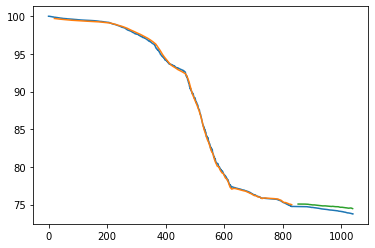

In [43]:
### Plotting 
# shift train predictions for plotting
look_back=20
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [44]:
len(test_data)

208

In [46]:
x_input=X_test[186:].reshape(1,-1)


In [47]:
x_input.shape

(1, 20)

In [48]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [49]:
len(temp_input)

20

In [50]:
temp_input

[0.006423834529356132,
 0.0057878304104490574,
 0.005775994514717997,
 0.005285078631662277,
 0.004799543364426118,
 0.0052110358916368504,
 0.005063443804409928,
 0.004812577084315706,
 0.004667525318116095,
 0.004066210728880915,
 0.003932844776359801,
 0.004155572092909843,
 0.004104686693720883,
 0.0035063080134043467,
 0.002889405691241631,
 0.002277533211481053,
 0.0017804686132762981,
 0.0015171820329369368,
 0.0010000044450708678,
 0.00030445822802516176]

In [51]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=20
i=0
while(i<240):
    print(i)
    
    if(len(temp_input)>20):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} month input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        print(x_input.shape)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} month output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0
[0.02690109]
21
1
1 month input [0.00578783 0.00577599 0.00528508 0.00479954 0.00521104 0.00506344
 0.00481258 0.00466753 0.00406621 0.00393284 0.00415557 0.00410469
 0.00350631 0.00288941 0.00227753 0.00178047 0.00151718 0.001
 0.00030446 0.02690109]
(1, 20)
1 month output [[0.03630007]]
2
2 month input [0.00577599 0.00528508 0.00479954 0.00521104 0.00506344 0.00481258
 0.00466753 0.00406621 0.00393284 0.00415557 0.00410469 0.00350631
 0.00288941 0.00227753 0.00178047 0.00151718 0.001      0.00030446
 0.02690109 0.03630007]
(1, 20)
2 month output [[0.05210152]]
3
3 month input [0.00528508 0.00479954 0.00521104 0.00506344 0.00481258 0.00466753
 0.00406621 0.00393284 0.00415557 0.00410469 0.00350631 0.00288941
 0.00227753 0.00178047 0.00151718 0.001      0.00030446 0.02690109
 0.03630007 0.05210152]
(1, 20)
3 month output [[0.07304417]]
4
4 month input [0.00479954 0.00521104 0.00506344 0.00481258 0.00466753 0.00406621
 0.00393284 0.00415557 0.00410469 0.00350631 0.00288941 0.00227753


In [52]:
len(lst_output)

240

In [53]:
lst_output

[[0.026901088654994965],
 [0.03630007058382034],
 [0.05210152268409729],
 [0.07304417341947556],
 [0.09876395016908646],
 [0.1290145367383957],
 [0.1632860153913498],
 [0.20063547790050507],
 [0.23966297507286072],
 [0.278655469417572],
 [0.3158611059188843],
 [0.3497867286205292],
 [0.37942200899124146],
 [0.4043092131614685],
 [0.42446571588516235],
 [0.44022995233535767],
 [0.452107310295105],
 [0.4606512188911438],
 [0.46638888120651245],
 [0.4697875380516052],
 [0.47124189138412476],
 [0.4710332751274109],
 [0.46946465969085693],
 [0.46676456928253174],
 [0.46313345432281494],
 [0.45875000953674316],
 [0.4537741541862488],
 [0.4483458995819092],
 [0.4425811171531677],
 [0.43656784296035767],
 [0.43036556243896484],
 [0.4240100383758545],
 [0.41752052307128906],
 [0.410907506942749],
 [0.40417754650115967],
 [0.39733582735061646],
 [0.3903868794441223],
 [0.3833346366882324],
 [0.37618207931518555],
 [0.36893129348754883],
 [0.36158356070518494],
 [0.3541393280029297],
 [0.34659814

In [54]:
lst_output = scaler.inverse_transform(lst_output)

In [55]:
lst_output

array([[74.47561782],
       [74.72210809],
       [75.1365045 ],
       [75.68572991],
       [76.36023646],
       [77.15356445],
       [78.05234118],
       [79.03183869],
       [80.055343  ],
       [81.07792936],
       [82.05365499],
       [82.94336158],
       [83.72055304],
       [84.37322519],
       [84.90183371],
       [85.31525413],
       [85.62674034],
       [85.85080613],
       [86.00127753],
       [86.09040802],
       [86.12854875],
       [86.12307774],
       [86.08194047],
       [86.01113003],
       [85.91590328],
       [85.80094652],
       [85.67045367],
       [85.52809655],
       [85.37691392],
       [85.21921454],
       [85.05655843],
       [84.88988348],
       [84.71969457],
       [84.54626684],
       [84.36977221],
       [84.19034669],
       [84.00810907],
       [83.82316252],
       [83.6355852 ],
       [83.44543182],
       [83.25273598],
       [83.05750941],
       [82.85974039],
       [82.65940234],
       [82.45644837],
       [82

In [56]:
day_new=np.arange(1,len(forest_left)+1)
day_new_pred = np.arange(0, 171)
day_pred=np.arange(len(forest_left)+1,len(forest_left)+1+240)
day_test_pred = np.arange(171,198)

In [57]:
day_test_pred

array([171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
       184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
       197])

In [58]:
len(day_new_pred)

171

In [59]:
import matplotlib.pyplot as plt

In [60]:
len(df1)

1040

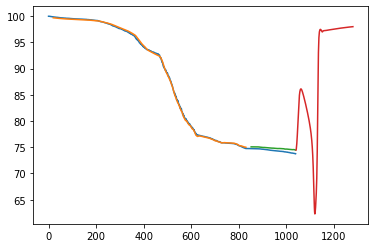

In [61]:
### Plotting 
# shift train predictions for plotting
look_back=20
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
#plot future
plt.plot(day_pred, lst_output)
plt.show()